In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fa_har= pd.read_csv(r"C:\Users\kamil\OneDrive\Dokumenty\GitHub\Capstone_Project\Kamila\dataframes_csv\fa_har.csv", index_col=0)
fa_correct = pd.read_csv(r"C:\Users\kamil\OneDrive\Dokumenty\GitHub\Capstone_Project\Kamila\dataframes_csv\fa_correct.csv", index_col=0)
fa_conec = pd.read_csv(r"C:\Users\kamil\OneDrive\Dokumenty\GitHub\Capstone_Project\Kamila\dataframes_csv\fa_conec.csv", index_col=0)
fa = pd.read_csv(r"C:\Users\kamil\OneDrive\Dokumenty\GitHub\Capstone_Project\Kamila\dataframes_csv\fa.csv", index_col=0)

In [2]:
fa_conec.shape

(165, 1798)

In [3]:
fa_correct.head(2)

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
002MSVIS,0.401281,0.375880,0.493108,0.360572,0.348160,0.389351,0.332114,0.349945,0.291961,0.321164,...,0.331984,0.384339,0.359255,0.353211,0.349225,51.53,1,22.18,7.5,1
003MSVIS,0.338079,0.345057,0.457120,0.341322,0.359009,0.338479,0.327782,0.334441,0.000000,0.331603,...,0.306799,0.360030,0.332175,0.331107,0.343456,58.06,0,9.57,6.0,1


Boxplots of the dfs: fa_conec, fa_correct and fa_har (without imputation)


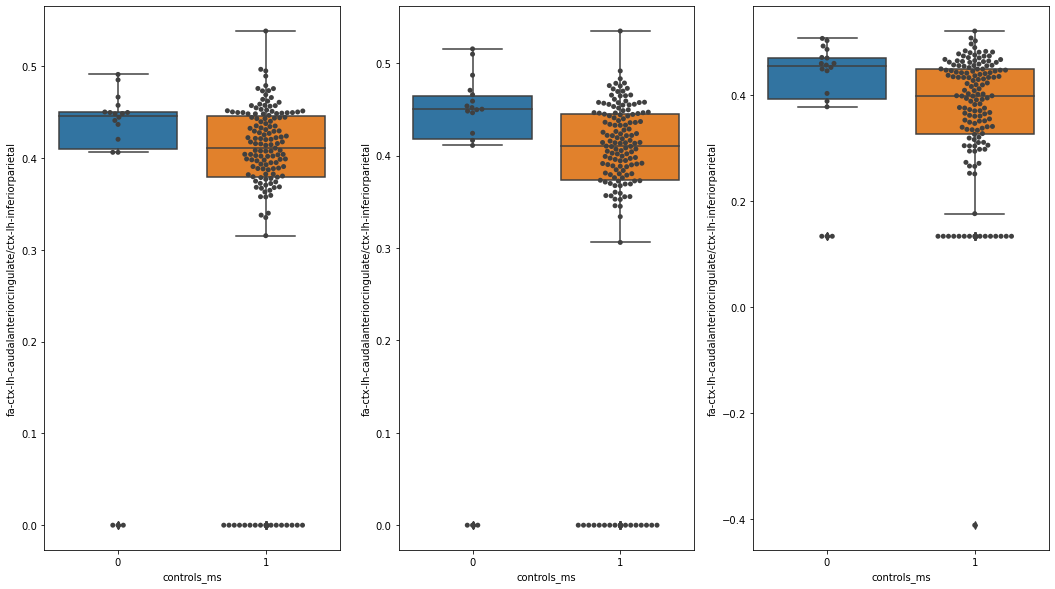

In [47]:
clinical_data = fa.iloc[:, -5:]
feats = fa_har.columns.to_list()
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
data = [pd.concat([fa_conec, clinical_data], join="inner", axis=1), fa_correct,fa_har]
print("Boxplots of the dfs: fa_conec, fa_correct and fa_har (without imputation)")
for i in range (3):
    sns.boxplot(ax=axes[i],
               y= feats[1],
               x = "controls_ms",
               data=data[i])
    sns.swarmplot(ax = axes[i],
                 y=feats[1],
                 x = "controls_ms",
                 data=data[i],
                 color=".25")


### Shapiro test

In [5]:
patients_har = fa_har[fa_har["controls_ms"]==1]
controls_har = fa_har[fa_har["controls_ms"]==0]
print(patients_har.shape, controls_har.shape)
patients_har.head(2)

(147, 1803) (18, 1803)


,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
002MSVIS,0.405534,0.309844,0.504487,0.348579,0.355668,0.312482,0.340716,0.352484,0.298572,0.320774,...,0.350525,0.391833,0.369048,0.359143,0.358676,51.53,1,22.18,7.5,1
003MSVIS,0.339186,0.250627,0.464384,0.323221,0.369571,0.248706,0.335976,0.335166,0.003320,0.332593,...,0.322169,0.364348,0.343253,0.334036,0.351575,58.06,0,9.57,6.0,1


In [6]:
from scipy.stats import shapiro
patients_har_gausian = []
patients_har_not_gausian = []
controls_har_gausian = []
controls_har_not_gausian = []
#Statistical tests to check if the data has a Gaussian distribution.


for attr in feats:
    stat,p = shapiro(patients_har[attr])
    #print(attr[0],'stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        patients_har_gausian.append(attr)
        #print(attr, 'Probably Gaussian')
        
    else:
        patients_har_not_gausian.append(attr)
        #print(attr,'Probably not Gaussian')
        
for attr in feats:
    stat,p = shapiro(controls_har[attr])
    #print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        controls_har_gausian.append(attr)
        #print(attr, 'Probably Gaussian')
        
    else:
        controls_har_not_gausian.append(attr)
        #print(attr,'Probably not Gaussian')

C:\Users\kamil\anaconda3\lib\site-packages\scipy\stats\morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [7]:
har_patients_perc_normal = str(round((len(patients_har_gausian)/(len(patients_har_gausian)+len(patients_har_not_gausian )))*100))
har_controls_perc_normal = str(round((len(controls_har_gausian)/(len(controls_har_gausian)+len(controls_har_not_gausian )))*100))
print("PATIENTS: {}% ({}) of the {} columns contains data with normal distribution.".format(har_patients_perc_normal, len(patients_har_gausian), len(patients_har.columns)))
print("CONTROLS: {}% ({}) of the {} columns contains data with normal distribution.".format(har_controls_perc_normal, len(controls_har_gausian), len(controls_har.columns)))

PATIENTS: 18% (322) of the 1803 columns contains data with normal distribution.
CONTROLS: 68% (1231) of the 1803 columns contains data with normal distribution.


In [8]:
#fa_correct.columns.get_loc('fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal')

### Trying yeo -johnson power transform to normalize the data

In [48]:
from sklearn.preprocessing import power_transform
data = fa_har.iloc[:,[1,-1]]
indexes = data.index.tolist()


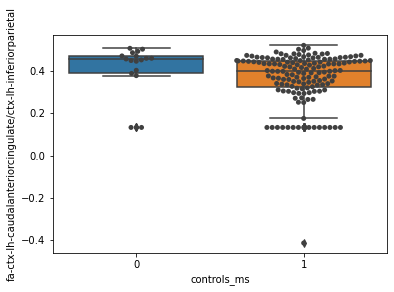

In [49]:
ax = sns.boxplot(x="controls_ms", y ="fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal", data = data)
ax = sns.swarmplot(x="controls_ms", y ="fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal", data = data, color = ".25")

In [50]:
from sklearn.preprocessing import power_transform
test = power_transform(data, method = 'yeo-johnson')
test= pd.merge(pd.DataFrame(test[:,0], index = indexes, 
                            columns = ["fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal"]),
                            fa_correct.iloc[:,[-1]], left_index=True, right_index=True)
#fa_har_new = pd.merge(fa_har_t, fa_har_clinical, left_index=True, right_index=True)

In [51]:
test.head(2)

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,controls_ms
002MSVIS,-0.891941,1
003MSVIS,-1.290130,1


Boxplots of a the column 1 after yeo-johnson transform


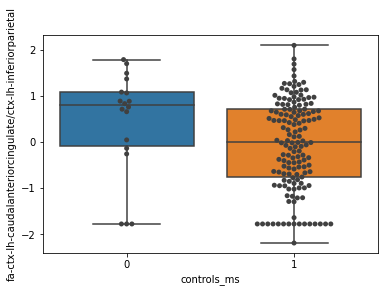

In [53]:
print("Boxplots of a the column 1 after yeo-johnson transform")
ax = sns.boxplot(x="controls_ms", y ="fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal", data = test)
ax = sns.swarmplot(x="controls_ms", y ="fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal", data = test, color = ".25")

In [54]:
fa_sum = fa_har.iloc[:,:-5]
clinical = fa_har.iloc[:,-5:]
fa_sum ["sum"] = fa_har.sum(axis=1)

In [55]:
fa_sum.head()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiorparietal/ctx-rh-supramarginal,fa-ctx-rh-superiorparietal/ctx-rh-transversetemporal,fa-ctx-rh-superiorparietal/ctx-rh-insula,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,sum
002MSVIS,0.405534,0.309844,0.504487,0.348579,0.355668,0.312482,0.340716,0.352484,0.298572,0.320774,...,0.364801,0.422249,0.423556,0.320071,0.350525,0.391833,0.369048,0.359143,0.358676,741.667092
003MSVIS,0.339186,0.250627,0.464384,0.323221,0.369571,0.248706,0.335976,0.335166,0.003320,0.332593,...,0.351899,0.369937,0.388637,0.325777,0.322169,0.364348,0.343253,0.334036,0.351575,719.600409
004MSVIS,0.436489,0.340221,0.506608,0.379214,0.382305,0.314799,0.386017,0.415346,0.003320,0.408681,...,0.416272,0.415835,0.428710,0.365245,0.314854,0.369418,0.375746,0.379528,0.366999,797.581564
005MSVIS,0.375246,0.363938,0.486952,0.281310,0.333460,0.379527,0.418560,0.398444,0.003320,0.369837,...,0.398230,0.427815,0.421719,0.397397,0.350089,0.403643,0.431096,0.413047,0.390422,738.774233
010MSVIS,0.360681,0.325107,0.458549,0.344328,0.361548,0.297931,0.376850,0.370608,0.389385,0.353486,...,0.375276,0.412932,0.415223,0.333874,0.288663,0.338199,0.364358,0.356653,0.354210,707.476300


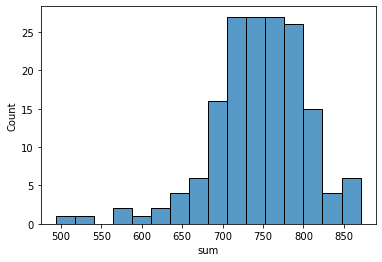

In [56]:
sns.histplot(data=fa_sum, x = "sum")

(165, 1799)


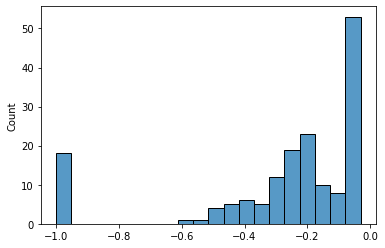

In [66]:
print(fa_sum.shape)
sns.histplot(data=fa_sum, bins = 20, x = fa_har.min(axis=1))

#### Getting coordinates of the -1 values in the dataframe

In [64]:
# Creating Dataframe object
df = fa_sum
  
# This function will return a list of
# positions where element exists
# in the dataframe.
def getIndexes(dfObj, value):
      
    # Empty list
    listOfPos = []
      
    # isin() method will return a dataframe with 
    # boolean values, True at the positions    
    # where element exists
    result = dfObj.isin([value])
      
    # any() method will return 
    # a boolean series
    seriesObj = result.any()
  
    # Get list of column names where 
    # element exists
    columnNames = list(seriesObj[seriesObj == True].index)
     
    # Iterate over the list of columns and
    # extract the row index where element exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
  
        for row in rows:
            listOfPos.append((row, col))
              
    # This list contains a list tuples with 
    # the index of element in the dataframe
    return listOfPos
  
# Calling getIndexes() function to get 
# the index positions of all occurrences
# of 22 in the dataframe
listOfPositions = getIndexes(df, -1)
  
print('Index positions of -1 in Dataframe : ')
  
# Printing the position
for i in range(len(listOfPositions)):
    print( listOfPositions[i])

Index positions of -1 in Dataframe : 


In [20]:
fa_sum.head()
fa_sum[fa_sum["min"]< -.8]

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiorparietal/ctx-rh-transversetemporal,fa-ctx-rh-superiorparietal/ctx-rh-insula,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,sum,min
c001MSVIS,0.420309,0.387793,0.527614,0.424363,0.393598,0.428977,0.415627,0.427535,0.003320,0.415655,...,0.433203,0.434668,0.393898,0.354179,0.391468,0.391088,0.411984,0.370053,784.191871,-1.0
c027MSVIS,0.404676,0.491903,0.539855,0.474031,0.423955,0.440850,0.408199,0.420099,0.003320,0.421243,...,0.468645,0.467065,0.373930,0.329443,0.378497,0.389111,0.404205,0.362443,758.469231,-1.0
c029MSVIS,0.414873,0.448612,0.508784,0.402618,0.384687,0.385928,0.386894,0.421630,0.415089,0.393589,...,0.408192,0.421192,0.371892,0.333360,0.361138,0.375297,0.370157,0.320794,761.580729,-1.0
c030MSVIS,0.398321,0.455930,0.518440,0.399047,0.346363,0.454523,0.405749,0.392632,0.425272,0.373435,...,0.453217,0.459965,0.385373,0.343464,0.408098,0.382537,0.389074,0.345981,808.766405,-1.0
c031MSVIS,0.444273,0.445226,0.536837,0.413107,0.378336,0.423073,0.452901,0.453709,0.003320,0.431194,...,0.484490,0.484091,0.390585,0.381356,0.388471,0.389443,0.410205,0.373117,819.529031,-1.0
c032MSVIS,0.386682,0.402492,0.500321,0.354099,0.359366,0.374313,0.392442,0.405043,0.003320,0.401361,...,0.399348,0.404920,0.326075,0.352028,0.390425,0.349733,0.360640,0.351840,753.335737,-1.0
c033MSVIS,0.387940,0.459201,0.494793,0.367651,0.354439,0.416678,0.387517,0.424424,0.399770,0.376868,...,0.439876,0.421756,0.374153,0.337050,0.386098,0.391368,0.387111,0.346091,747.319928,-1.0
c034MSVIS,0.387413,0.377231,0.500640,0.411820,0.374744,0.360155,0.409286,0.387112,0.462239,0.389946,...,0.416621,0.438228,0.384260,0.321324,0.389472,0.383818,0.413857,0.341920,772.305096,-1.0
c035MSVIS,0.388295,0.451502,0.463026,0.322408,0.329710,-0.175635,0.388950,0.391876,0.386787,0.355001,...,0.419406,0.430698,0.328758,0.313889,0.364116,0.359228,0.364921,0.334895,746.800313,-1.0
c036MSVIS,0.416069,0.469320,0.526592,0.421059,0.403617,0.393627,0.404005,0.406506,0.393541,0.401310,...,0.412626,0.431039,0.378529,0.364698,0.394616,0.391778,0.390158,0.374831,742.996177,-1.0


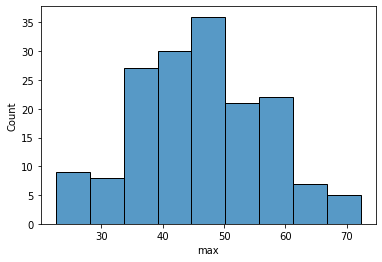

In [21]:
fa_sum["max"] = fa_har.max(axis=1)
sns.histplot(data=fa_sum, x = "max")

In [22]:
fa_sum[fa_sum["sum"]<600]

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiorparietal/ctx-rh-insula,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,sum,min,max
080MSVIS,0.382187,0.264912,0.545554,0.384785,-0.090507,-0.175635,0.426825,0.421555,0.003320,0.386814,...,0.359650,0.250682,0.280647,0.245988,0.026839,0.420107,0.215144,540.868605,-0.538516,51.00
119MSVIS,0.322909,0.339617,0.488226,-0.126380,0.327318,0.328842,0.334784,0.331647,0.003320,0.285306,...,0.424632,0.317647,0.275759,0.362669,0.354952,0.360516,0.342099,566.363303,-0.463257,33.80
FIS_080,0.258466,0.391282,0.395035,0.079457,0.057407,0.135097,0.300743,0.258209,-0.001386,0.287465,...,0.354656,0.257129,0.256691,0.239985,0.255904,0.284350,0.234808,494.079913,-0.076002,25.72
FIS_115,0.415010,0.400802,0.435005,0.079457,0.370324,0.135097,0.321641,0.383563,-0.001386,0.374640,...,0.393638,0.241387,0.280873,0.311606,0.281616,0.375528,0.320069,565.679764,-0.061466,48.66


In [23]:
fa_sum["zeros"] = fa_sum.shape[1] -((fa_sum > 0.2).sum(axis=1))
fa_sum.head(10)

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,sum,min,max,zeros
002MSVIS,0.405534,0.309844,0.504487,0.348579,0.355668,0.312482,0.340716,0.352484,0.298572,0.320774,...,0.320071,0.350525,0.391833,0.369048,0.359143,0.358676,741.667092,-0.258431,51.53,175
003MSVIS,0.339186,0.250627,0.464384,0.323221,0.369571,0.248706,0.335976,0.335166,0.003320,0.332593,...,0.325777,0.322169,0.364348,0.343253,0.334036,0.351575,719.600409,-0.194813,58.06,62
004MSVIS,0.436489,0.340221,0.506608,0.379214,0.382305,0.314799,0.386017,0.415346,0.003320,0.408681,...,0.365245,0.314854,0.369418,0.375746,0.379528,0.366999,797.581564,-0.203147,60.78,102
005MSVIS,0.375246,0.363938,0.486952,0.281310,0.333460,0.379527,0.418560,0.398444,0.003320,0.369837,...,0.397397,0.350089,0.403643,0.431096,0.413047,0.390422,738.774233,-0.177848,37.95,85
010MSVIS,0.360681,0.325107,0.458549,0.344328,0.361548,0.297931,0.376850,0.370608,0.389385,0.353486,...,0.333874,0.288663,0.338199,0.364358,0.356653,0.354210,707.476300,-0.254366,52.64,89
011MSVIS,0.354623,0.304803,0.478417,0.363105,0.381561,0.311442,0.386301,0.352525,0.316440,0.368905,...,0.345203,0.339268,0.398879,0.378528,0.360485,0.367570,809.563013,-0.135848,53.86,66
012MSVIS,0.373778,0.359812,0.507726,-0.126380,0.298411,0.314736,0.355409,0.364460,0.003320,0.347980,...,0.356499,0.313657,0.383667,0.366701,0.373139,0.372174,690.152726,-0.226028,43.65,117
017MSVIS,0.353549,0.251785,0.445760,0.336597,0.354297,-0.175635,0.382771,0.342164,0.003320,0.336294,...,0.305289,0.316276,0.352382,0.332560,0.364511,0.328776,681.383624,-0.256431,39.11,91
018MSVIS,0.371892,0.297140,0.466543,0.386525,0.413187,0.316174,0.348001,0.373685,0.405011,0.396892,...,0.357211,0.314086,0.356537,0.373594,0.359930,0.344675,682.632124,-0.203100,42.25,90
019MSVIS,0.399570,0.338657,0.496674,0.363290,0.329344,0.337212,0.377453,0.368684,0.395700,0.365118,...,0.405345,0.363330,0.398869,0.396643,0.416160,0.362859,743.561986,-0.214892,46.17,68


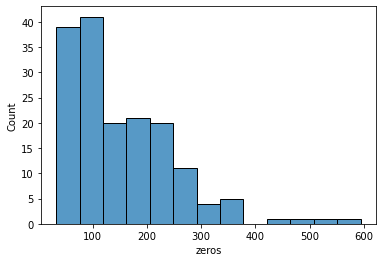

In [24]:
sns.histplot(data=fa_sum, x = "zeros")

In [25]:
#ax=sns.swarmplot(x="zeros", palette = "pastel", data = fa_sum)

In [26]:
fa_sum[fa_sum["zeros"]>400]

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,sum,min,max,zeros
080MSVIS,0.382187,0.264912,0.545554,0.384785,-0.090507,-0.175635,0.426825,0.421555,0.003320,0.386814,...,0.250682,0.280647,0.245988,0.026839,0.420107,0.215144,540.868605,-0.538516,51.00,453
FIS_072,0.438531,0.446390,0.527488,0.365890,0.394859,0.135097,0.445922,0.430991,0.286577,0.393733,...,0.356370,0.300811,0.344882,0.365642,0.394043,0.301798,674.192670,-0.066126,72.22,504
FIS_080,0.258466,0.391282,0.395035,0.079457,0.057407,0.135097,0.300743,0.258209,-0.001386,0.287465,...,0.257129,0.256691,0.239985,0.255904,0.284350,0.234808,494.079913,-0.076002,25.72,594
FIS_115,0.415010,0.400802,0.435005,0.079457,0.370324,0.135097,0.321641,0.383563,-0.001386,0.374640,...,0.241387,0.280873,0.311606,0.281616,0.375528,0.320069,565.679764,-0.061466,48.66,549


In [27]:
fa_sum1 = pd.merge(fa_sum,clinical, left_index=True, right_index=True)

Text(0.5, 1.0, 'Zeros & Edss')

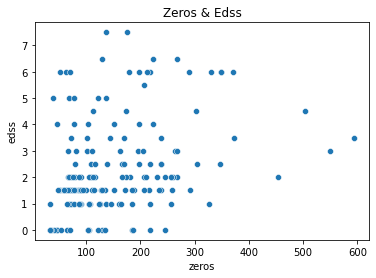

In [85]:
sns.scatterplot(x="zeros", y = "edss", data = fa_sum1).set_title("Zeros & Edss")

Text(0.5, 1.0, 'No. of zeros & disease duration')

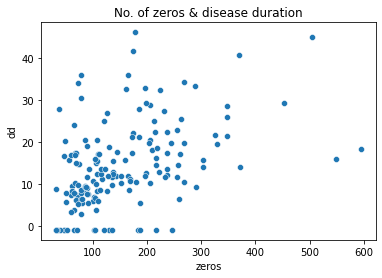

In [84]:
sns.scatterplot(x="zeros", y = "dd", data = fa_sum1).set_title("No. of zeros & disease duration")

In [30]:
fa_sum2 = fa_sum1[fa_sum1["zeros"]<400]
fa_sum2.shape

(161, 1807)

In [31]:
from scipy.stats import pearsonr
stat,p = pearsonr(fa_sum2["zeros"], fa_sum2["sum"])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-0.393, p=0.000


In [32]:
from scipy.stats import shapiro
gausian = []
nongausian = []
#controls_har_gausian = []
#controls_har_not_gausian = []
#Statistical tests to check if the data has a Gaussian distribution.


for attr in feats:
    stat,p = shapiro(fa_sum2[attr])
    #print(attr[0],'stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        gausian.append(attr)
        #print(attr, 'Probably Gaussian')
        
    else:
        nongausian.append(attr)
print(len(gausian),len(nongausian))

388 1415


In [33]:
#fa_sum: 264 1539
#fa_sum1:388 1415

In [73]:
fa_conec["zeros"] = fa_conec.shape[1] -((fa_conec > 0).sum(axis=1))

Text(0.5, 1.0, 'Number of Zeros')

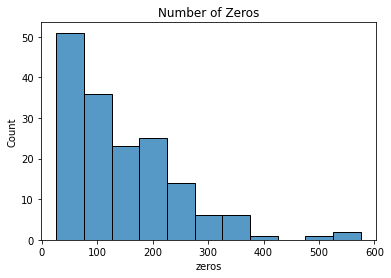

In [82]:
sns.histplot(data=fa_conec, x = "zeros").set_title("Number of Zeros")

In [86]:
fa_conec[fa_conec["zeros"]> 460]

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiorparietal/ctx-rh-transversetemporal,fa-ctx-rh-superiorparietal/ctx-rh-insula,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,zeros,min
FIS_072,0.426419,0.461897,0.542640,0.368253,0.384866,0.0,0.461274,0.416137,0.347725,0.374265,...,0.420889,0.432155,0.350393,0.308364,0.337768,0.363080,0.384366,0.292110,568,0.0
FIS_080,0.266359,0.335076,0.394427,0.000000,0.000000,0.0,0.309339,0.260744,0.000000,0.297674,...,0.347231,0.359254,0.266964,0.276583,0.227561,0.288601,0.285289,0.224505,575,0.0
FIS_115,0.420384,0.372277,0.441950,0.000000,0.382037,0.0,0.331461,0.391697,0.000000,0.381982,...,0.388366,0.403142,0.239132,0.294060,0.311705,0.297507,0.387525,0.324272,523,0.0


#### Average number of zeros - patients & controls

In [81]:
avg_zeros = fa_conec["zeros"].mean()
std_zeros =fa_conec["zeros"].std()
print("Average number of zeros: %.3f, SD: %.3f" % (avg_zeros, std_zeros))

Average number of zeros: 148.667, SD: 103.534


In [37]:
fa_conec["min"] = fa_conec.min(axis=1)

In [38]:
#sns.histplot(data=fa_conec, x = "min")

In [39]:
#fa_sum.drop(columns = "min",inplace=True)
fa_sum.head()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,sum,min,max,zeros
002MSVIS,0.405534,0.309844,0.504487,0.348579,0.355668,0.312482,0.340716,0.352484,0.298572,0.320774,...,0.320071,0.350525,0.391833,0.369048,0.359143,0.358676,741.667092,-0.258431,51.53,175
003MSVIS,0.339186,0.250627,0.464384,0.323221,0.369571,0.248706,0.335976,0.335166,0.003320,0.332593,...,0.325777,0.322169,0.364348,0.343253,0.334036,0.351575,719.600409,-0.194813,58.06,62
004MSVIS,0.436489,0.340221,0.506608,0.379214,0.382305,0.314799,0.386017,0.415346,0.003320,0.408681,...,0.365245,0.314854,0.369418,0.375746,0.379528,0.366999,797.581564,-0.203147,60.78,102
005MSVIS,0.375246,0.363938,0.486952,0.281310,0.333460,0.379527,0.418560,0.398444,0.003320,0.369837,...,0.397397,0.350089,0.403643,0.431096,0.413047,0.390422,738.774233,-0.177848,37.95,85
010MSVIS,0.360681,0.325107,0.458549,0.344328,0.361548,0.297931,0.376850,0.370608,0.389385,0.353486,...,0.333874,0.288663,0.338199,0.364358,0.356653,0.354210,707.476300,-0.254366,52.64,89
